In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10,8)
import scipy.stats as stats
plt.rc('axes', labelsize=15)

In [2]:
class CRR:

    def __init__(self, S_0, K, T, r, sigma):
        self.S_0 = S_0
        self.K = K
        self.T = T
        self.r  = r
        self.sigma  = sigma
        return None

    def Price(self, M, otype='Call'):
        delta = self.T / M # length of intervals
        df = np.exp(-self.r*delta) # Discount factor per interval

        u = np.exp(self.sigma*np.sqrt(delta))
        d = 1 / u
        if ((self.sigma / np.sqrt(delta)) <= self.r or self.r <= -(self.sigma / np.sqrt(delta)) ):
            print('Arbitrage Exists !!')
        else :
            q = (np.exp(self.r*delta) - d) / (u - d)
            idx = np.arange(M+1)
            S_T = self.S_0 * (u**idx) * (d**(M - idx))

            if otype == 'Call':
                V = np.maximum(S_T - self.K, 0.0)
            if otype == 'Put':
                V = np.maximum(self.K - S_T, 0.0)

        
            for t in range(M-1, -1, -1):
                for i in range(t):
                    V[i] = (q*V[i+1] + (1-q)*V[i])*df
            return V[0]

    def PlotConvergence(self, Mmin, Mmax, step_size, otype='Call'):
         m = np.arange(Mmin, Mmax, step_size)
         payoff = [self.Price(M,otype=otype) for M in m]
         plt.plot(m, payoff, color='darkred', label=otype + 'Payoff')
         plt.legend(prop={'weight':'bold'})
         plt.title(otype + ' Payoff Vs Number of trading days', fontdict={'size':20, 'weight':'bold'})
         plt.xlabel(r'$k_n$')
         plt.ylabel(r'$\pi_n^C(0)$')
         
    def BSM(self, otype='Call'):
         d_1 = (np.log(self.S_0 / self.K) + (self.r + ((self.sigma)**2)/2)*self.T) / (self.sigma * np.sqrt(self.T))
         d_2 = d_1 - self.sigma * np.sqrt(self.T)
         df = np.exp(-self.r * self.T)
         C_payoff = self.S_0*stats.norm.cdf(d_1) - self.K*df*stats.norm.cdf(d_2)
         if otype == 'Call':
             return C_payoff
         if otype =='Put':
             return C_payoff - self.S_0 + self.K * df    

In [3]:
crr = CRR(S_0 = 1, K = 0.2, T = 1.0, r = 0.05, sigma = 0.2)

In [4]:
crr.BSM(otype = 'Call')

0.8097541150998572

In [5]:
crr.BSM(otype='Put')

5.573526022256971

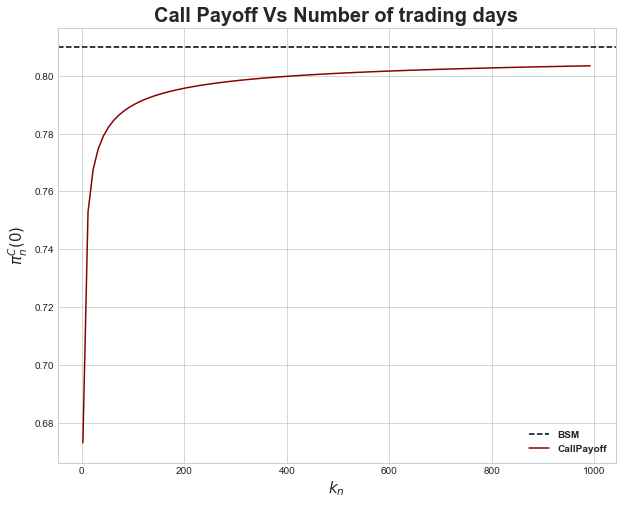

In [6]:
plt.axhline(crr.BSM(), color='black', linestyle='dashed', label='BSM')
crr.PlotConvergence(2,1000, 10)
#plt.savefig('./BSCRR.pdf', format='pdf', dpi=400)